In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import os
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [2]:
#conventie de date M = 1. B = 0
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    def transform_output(output):
        return 1 if output == 'M' else 0

    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [transform_output(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

In [3]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['g' if val == 0 else 'r' if val == 1 else 'b' for val in yTrain]
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label='Radius vs Texture')
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='learnt model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='black', marker='^', label='test data')
    
    plt.title(title)
    plt.legend()
    plt.show()

def plot3DdataEstetic(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['g' if val == 0 else 'r' if val == 1 else 'b' for val in yTrain]
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label='Radius vs Texture')
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='learnt model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='black', marker='^', label='test data')
    
    plt.title(title)

    plt.legend()
    plt.show()

def plot2Ddata(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

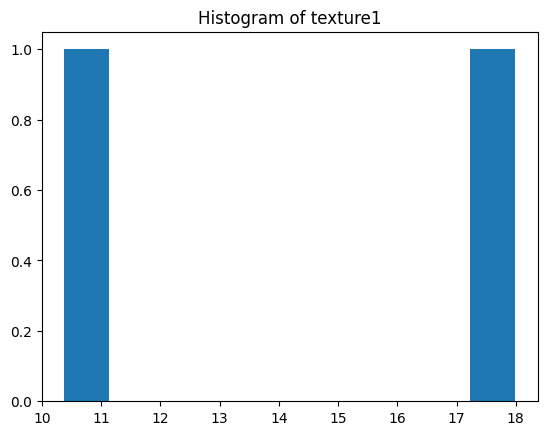

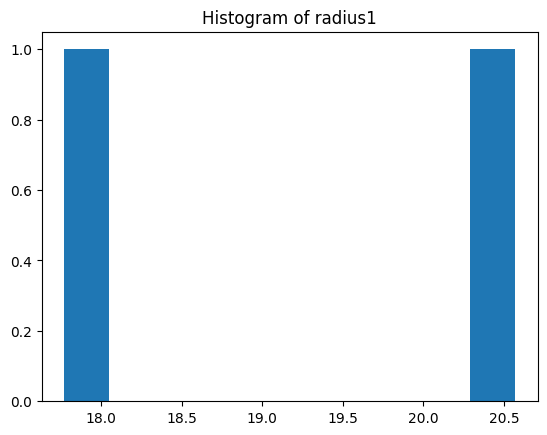

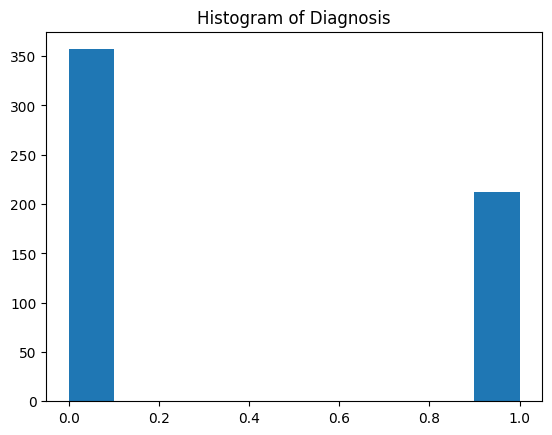

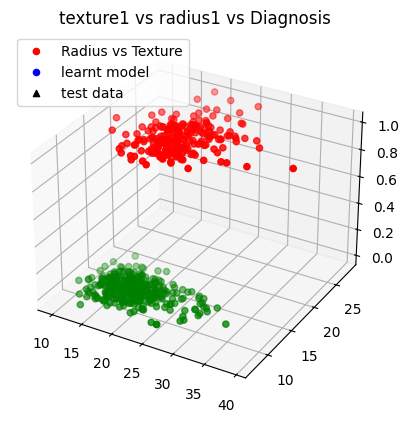

In [4]:
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'D:/FACULTATE/SEM4/AI/Lab6/breast+cancer+wisconsin+diagnostic', 'wdbc.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['texture1', 'radius1'], 'Diagnosis')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]


plot2Ddata(inputs[0], "texture1")
plot2Ddata(inputs[1], "radius1")

plot2Ddata(outputs, 'Diagnosis')

plot3DdataEstetic(feature1, feature2, outputs, [], [], [], [], [], [], 'texture1 vs radius1 vs Diagnosis')

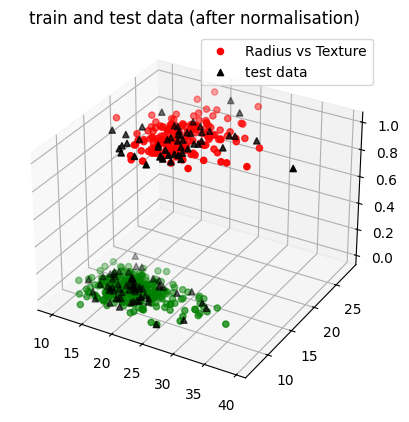

In [5]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, None, None, None, feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


model = LogisticRegression()
model.fit(trainInputs, trainOutputs)

accuracy = model.score(testInputs, testOutputs)
print("Accuracy:", accuracy)

#Coef
w1, w2 = model.coef_[0]
w0 = model.intercept_[0]

# Afișarea coeficienților și interceptării
print("Model coefficients:")
print("f(x) =  1/ 1+ e^-z.......z= ", w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

Accuracy: 0.8070175438596491
Model coefficients:
f(x) =  1/ 1+ e^-z.......z=  -23.20486745717624  +  0.2448064130947617  * x1 +  1.2436777768597458  * x2


In [10]:
from sklearn.metrics import accuracy_score

probabilities = model.predict_proba(testInputs)

threshold = 0.4
predicted_labels = [1 if probability[1] > threshold else 0 for probability in probabilities]

new_accuracy = accuracy_score(testOutputs, predicted_labels)
print("New Accuracy", threshold, ":", new_accuracy)

New Accuracy 0.4 : 0.8070175438596491


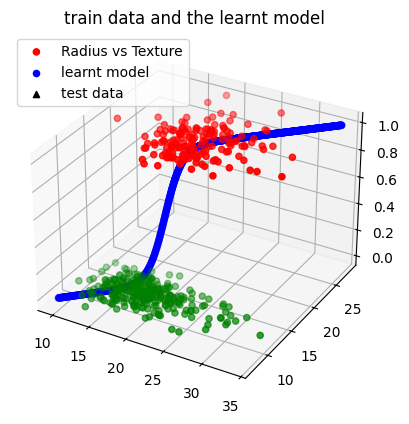

In [46]:
import numpy as np
from statistics import mean
trainInputs = np.array(trainInputs)
noOfPoints = 1000
xref1 = []
val = min(trainInputs[:, 0])
step1 = (max(trainInputs[:, 0]) - min(trainInputs[:, 0])) / noOfPoints
for _ in range(noOfPoints):
    xref1.append(val)
    val += step1

xref2 = []
val = min(trainInputs[:, 1])
step2 = (max(trainInputs[:, 1]) - min(trainInputs[:, 1])) / noOfPoints
for _ in range(noOfPoints):
    xref2.append(val)
    val += step2

yref = [1 / (1 + np.exp(-(w0 + w1 * el1 + w2 * el2))) for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')


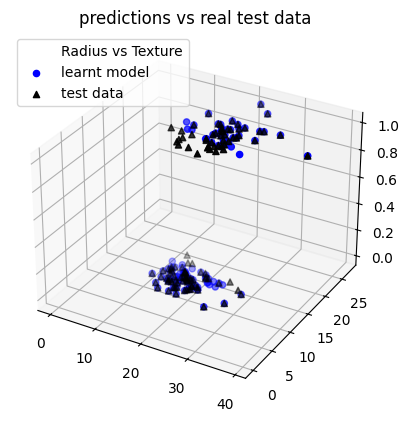

In [18]:
computedTestOutputs = model.predict(testInputs)

plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

In [32]:
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)
print(accuracy)
error = 1 - accuracy

print('prediction error (tool):   ', error)

prediction error (manual):  0.19298245614035087
0.8070175438596491
prediction error (tool):    0.19298245614035092


In [20]:
ec = 1 / (1 + np.exp(-(w0 + w1 * 10 + w2 * 18)))
print("Rez ec", ec)
if ec >= 0.5:
    print("Malign")
else:
    print("Benign ")

Rez ec 0.8360869701037806
Malign
